# Исследование данных о продажах игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель исследования** — выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании интернет-магазина, который продаёт по всему миру компьютерные игры.

Исследовательский анализ данных включает в себя следующие пункты:
* Посмотреть, сколько игр выпускалось в разные годы. Определить, важны ли данные за все периоды?
* Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Проанализировать, за какой характерный срок появляются новые и исчезают старые платформы?
* В результате исследования предыдущих вопросов определить актуальный период, за который стоит рассматривать данные. Основной фактор — данные помогут построить прогноз на 2017 год. Данные за предыдущие годы не учитывать.
* Определить платформы, которые лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ.
* Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам и описать результат.
* Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков; построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
* Соотнести выводы с продажами игр на других платформах.
* Посмотреть на общее распределение игр по жанрам, определить самые прибыльные жанры. Выделить жанры с высокими и низкими продажами.

Для составления портрета пользователя каждого региона необходимо определить для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5) и описать различия в долях продаж;
* Самые популярные жанры (топ-5) и поясните разницу;
* Влияние рейтинга ESRB на продажи в отдельном регионе.

Проверка гипотез:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Ход исследования:**

Данные с архивом объявлений мы получим из файла 'games.csv'.

О качестве данных ничего не известно. Поэтому перед проведением исследовательского анализа нам понадобится сделать обзор данных.

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдет в несколько этапов:

1. Изучение данных.
2. Предобработка данных.
3. Исследовательский анализ данных.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from tqdm.auto import tqdm

Откроем файл с данными, выведем содержание датафрейма и получим общую информацию:

In [2]:
df = pd.read_csv('games.csv')
display(df.head(5))
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Согласно документации к данным в таблице одиннадцать столбцов:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

В каждой строке таблицы — данные о продажах игры, ее оценки пользователями и экспертами, жанр и платформа. 
В названии столбцов встречаются символы верхнего и нижнего регистра.
В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating присутствуют пропуски. 
В столбцах Year_of_Release тип данных не соответсвует документации.  

### Вывод

Предварительно можно утверждать, что данных достаточно для проведения исследования. Однако в названиях стобцов есть символы нижнего и верхнего регистра. В некоторых столбцах есть пропуски, тип данных в одном столбце не соответствуют документации. Кроме того, нужно проверить данные на наличие ошибок, и, если они есть, исправить их.

## Предобработка данных

In [3]:
# приведем названия стобцов к нижнему регистру
df.columns = [i.lower() for i in df.columns]
display(df.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проанализируем долю пропусков в столбцах:

In [4]:
print(df.isna().mean())

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64


In [5]:
# отбросим пропуски в столбцах name и year_of_release, эти стобцы критичны, доля пропусков в них составляет менее 5%
df = df.dropna(subset=['name', 'year_of_release'])
print(df.isna().mean())

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.405984
dtype: float64


Изучим пропуски в столбцах critic_score и user_score, содержащие количественные данные:

In [6]:
display(df[df['critic_score'].isna()].head(5))
display(df[df['user_score'].isna()].tail(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Поскольку в данных столбцах у нас находятся рейтинги и аппроксимировать их - не лучшая идея, заполним пропуски заглушками:

In [7]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Также изучим пропуски в столбце raiting, который содержит категориальные данные:

In [8]:
display(df[df['rating'].isna()].tail(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,-1.0,-1,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,-1.0,-1,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,-1.0,-1,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,-1.0,-1,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,-1.0,-1,NaN


In [9]:
# найдем число игр с группировкой по рейтингу ESRB:
print(df.pivot_table(index=['rating'], values='name', aggfunc=['count']))

       count
        name
rating      
AO         1
E       3921
E10+    1393
EC         8
K-A        3
M       1536
RP         1
T       2905


Делаем вывод, что мы можем сократить количество категорий; уберем из датасета игры с рейтингом AO, EC, K-A и RP:

In [10]:
df = df.query('rating != "AO" & rating != "EC" & rating != "K-A" & rating != "RP"')

Заполним пропуски в столбце rating с неизвестными категориями значением U (unknown):

In [11]:
df['rating'] = df['rating'].fillna('U')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16431 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16431 non-null  object 
 1   platform         16431 non-null  object 
 2   year_of_release  16431 non-null  float64
 3   genre            16431 non-null  object 
 4   na_sales         16431 non-null  float64
 5   eu_sales         16431 non-null  float64
 6   jp_sales         16431 non-null  float64
 7   other_sales      16431 non-null  float64
 8   critic_score     16431 non-null  float64
 9   user_score       16431 non-null  object 
 10  rating           16431 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Вывод: пропуски в столбцах являются абсолютно случайными; вероятные причины связаны с отсутсвием данных, либо с ошибками записи.

In [12]:
# Преобразуем тип данных в столбце year_of_release в соответствии с документацией
df['year_of_release'] = df['year_of_release'].astype('int')

# Преобразуем тип данных в столбце critic_score в соответствии с документацией
df['critic_score'] = df['critic_score'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16431 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16431 non-null  object 
 1   platform         16431 non-null  object 
 2   year_of_release  16431 non-null  int32  
 3   genre            16431 non-null  object 
 4   na_sales         16431 non-null  float64
 5   eu_sales         16431 non-null  float64
 6   jp_sales         16431 non-null  float64
 7   other_sales      16431 non-null  float64
 8   critic_score     16431 non-null  int32  
 9   user_score       16431 non-null  object 
 10  rating           16431 non-null  object 
dtypes: float64(4), int32(2), object(5)
memory usage: 1.4+ MB


Рассмотрим более подробно столбец user_score:

In [13]:
print(df['user_score'].unique())
display(df[df['user_score']=='tbd'].head(5))

['8' -1 '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-1,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-1,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,-1,tbd,E


С большой вероятностью значение 'tdb' в столбце означает 'to be determined'(неизвестно / подлежит определению). Обработаем соответсвующие значения и изменим тип данных в столбце user_score, чтобы он соответствовал документации:

In [14]:
# check
df_u = df.copy()
df_u['user_score'] = df_u['user_score'].replace('tbd', np.nan)
df_u['user_score'] = df_u['user_score'].astype('float', errors='ignore')
df_u[df_u['user_score'] <= 0.001]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,U
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,U
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,U
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,U
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1,-1.0,U
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,U
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,U
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,U
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,U


In [15]:
# изменим значения tdb на -1
df['user_score'] = df['user_score'].replace('tbd', -1)
df['user_score'] = df['user_score'].astype('float', errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16431 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16431 non-null  object 
 1   platform         16431 non-null  object 
 2   year_of_release  16431 non-null  int32  
 3   genre            16431 non-null  object 
 4   na_sales         16431 non-null  float64
 5   eu_sales         16431 non-null  float64
 6   jp_sales         16431 non-null  float64
 7   other_sales      16431 non-null  float64
 8   critic_score     16431 non-null  int32  
 9   user_score       16431 non-null  float64
 10  rating           16431 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


Теперь создадим в датафреме новый столбец 'total_sales' и запишем в него суммарные продажи во всех регионах (NA, EU и JP):

In [16]:
df['global_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales
display(df.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,U,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,U,31.38


### Вывод
Предобработка данных завершена, приступим к исследовательскому анализу.

##  Исследовательский анализ данных

### Количество выпущенных игр в разные годы

Посмотрим, сколько игр выпускалось в разные годы:

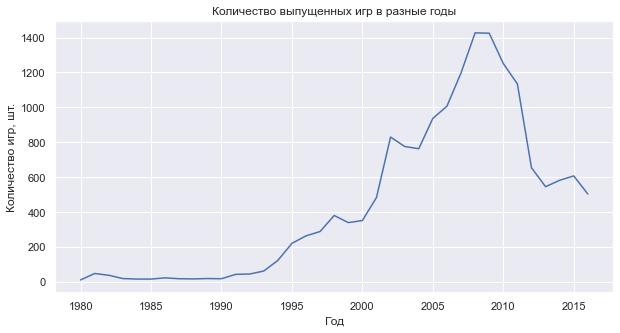

In [17]:
sns.set(rc={'figure.figsize':(10, 5)})
fig, ax = plt.subplots()

# добавим название графика и подписи к осям:
ax.set_title('Количество выпущенных игр в разные годы')
ax.set_xlabel('Год')
ax.set_ylabel('Количество игр, шт.')

sns.lineplot(x='year_of_release', y='name', data=df.groupby('year_of_release').count());
plt.show()

In [18]:
print(len(df.query('year_of_release < 2000'))/len(df)) # доля игр, вышедших до 2000 года

0.11995618039072485


Очевидно, что не все данные важны. Отбросим игры, вышедшие до 2000 года, учитывая срок давности и их долю от общего числа:

In [19]:
df = df.query('year_of_release >= 2000') 

По графику видим, что с 2010 года тренд на рынке изменился: игры стали выпускаться в меньшем количестве. 
С 2015 года эта тенденция еще более усугубилась. Вероятные причины связаны с какими-то внешними факторами. Учтем эти факты для дальнейшего анализа. 

### Изменение продаж по платформам

Изучим, как менялись продажи игр по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам:

ТОП — 6 платформ по объему суммарных продаж:
 platform
PS2     1233.32
X360     961.24
PS3      931.34
Wii      890.52
DS       802.11
PS4      314.14
Name: global_sales, dtype: float64


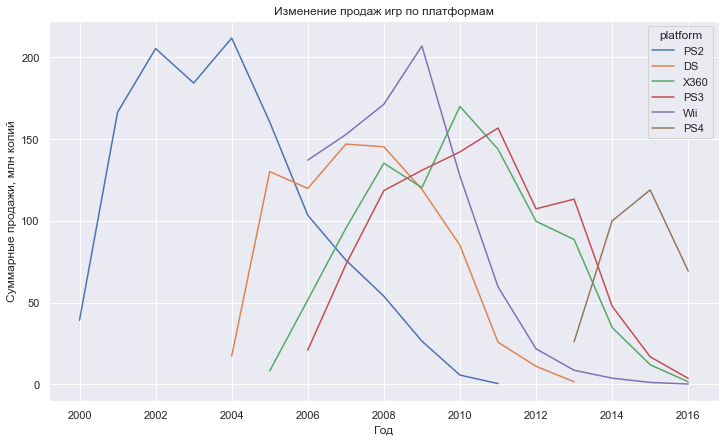

In [20]:
# Создадим функцию platforms_analisys, которая находит ТОП-платформ глубиной depth с наибольшими суммарными продажами 
# и строит для них распределение по годам
def platforms_analisys(data, depth=6):
    # найдем ТОП-6 платформ с наибольшими суммарными продажами за весь период
    print("ТОП —",depth,"платформ по объему суммарных продаж:\n", data.groupby('platform')['global_sales'].sum().sort_values(ascending=False)[:depth])
    
    # запишем в top_platforms названия ТОП-6 платформ
    top_platforms = data.groupby('platform')['global_sales'].sum().sort_values(ascending=False)[:depth].index.tolist()

    new_df = data.query('platform in @top_platforms').pivot_table(index=['year_of_release','platform'], values='global_sales', aggfunc=['sum']).reset_index()
    new_df.columns = ['year_of_release', 'platform', 'global_sales']

    #построим распределение по годам
    sns.set(rc={'figure.figsize':(12,7)})
    fig, ax = plt.subplots()
    ax.set_title('Изменение продаж игр по платформам')
    ax.set_xlabel('Год')
    ax.set_ylabel('Суммарные продажи, млн копий')
    
    sns.lineplot(data=new_df, x="year_of_release", y="global_sales", hue="platform");
    return 1

#проанализируем продажи игр по ТОП-6 платформ, используя platforms_analisys
platforms_analisys(df,6);

**Вывод:**
* ТОП-6 платформ по объему суммарных продаж с 2000 года: PS2, X360, PS3, Wii, DS, PS4;
* Характерный срок, за который появляются новые и исчезают старые платформы, составляет 5 лет.

### Актуальный период

Чтобы построить прогноз продаж на 2017 год, целесообразно рассматривать только актуальные данные.
В п.3.1 мы обнаружили, что тренд на рынке игр резко изменился в 2010 и 2015 году.
Учитывая этот факт и принимая во внимание, что данные за 2016 год могут быть неполными, в качестве актуального периода возьмем информацию за последние 2 года:

In [21]:
df = df.query('year_of_release >= 2015')

### Потенциально прибыльные платформы

Сначала определим, какие платформы лидируют по продажам, растут или падают за актуальный период: 

ТОП — 10 платформ по объему суммарных продаж:
 platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
PC       13.77
X360     13.48
PSV      10.50
Wii       1.32
PSP       0.12
Name: global_sales, dtype: float64


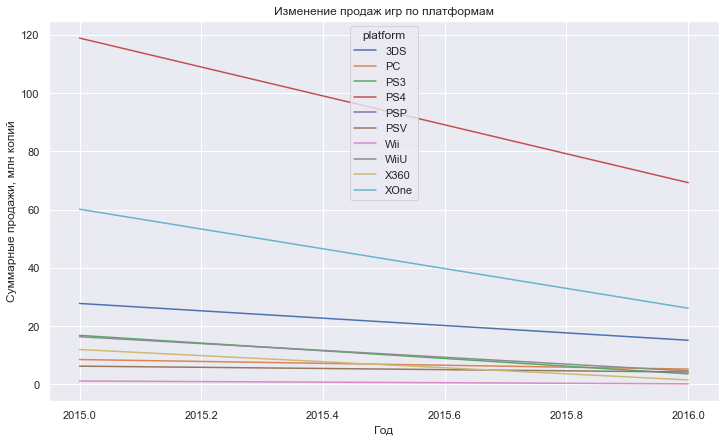

In [22]:
# ТОП-10 платформ-лидеров по продажам
platforms_analisys(df, 10);

**На основании графика для актуального периода делаем выводы:**
* ТОП-5 платформ-лидеров по продажам: PS4, XOne, 3DS, WiiU, PS3;
* Продажи падают по всем платформам;
* ТОП-3 платформ с наибольшим потенциалом по прибыли: PS4, XOne и 3DS.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Построим диаграмму размаха по глобальным продажам игр для ТОП-3 потенциально прибыльных платформ: 

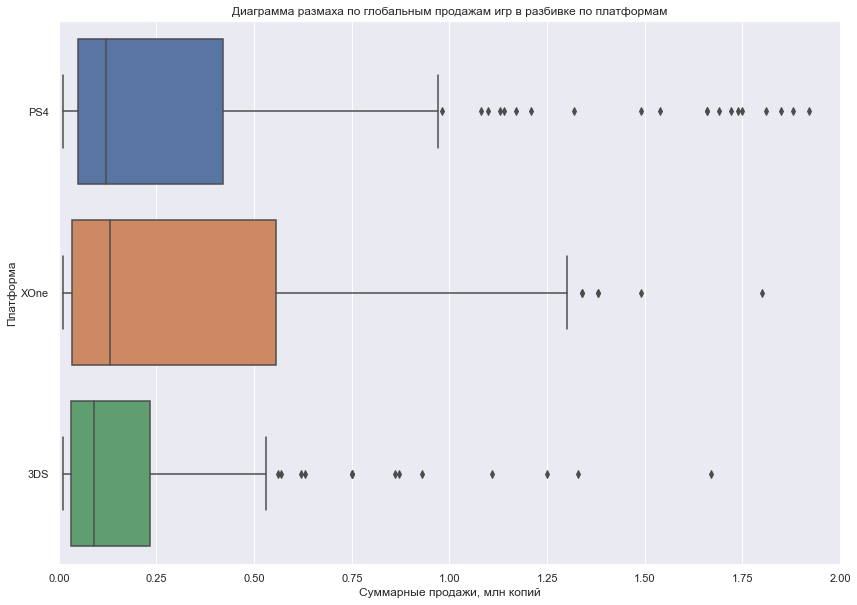

In [23]:
platform_list = ['PS4', 'XOne', '3DS']

tmp_df = df.query('platform in @platform_list')
sns.set(rc={'figure.figsize':(14,10)})

fig, ax = plt.subplots()
ax.set_title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')

sns.boxplot(x=tmp_df['global_sales'], y=tmp_df['platform']).set(xlim=(0, 2));
ax.set_xlabel('Суммарные продажи, млн копий')
ax.set_ylabel('Платформа')
plt.show()

Построим еще одну диаграмму размаха, отображающую все выбросы, чтобы определить, на какой платформе самые значительные выбросы — игры-рекордсмены:

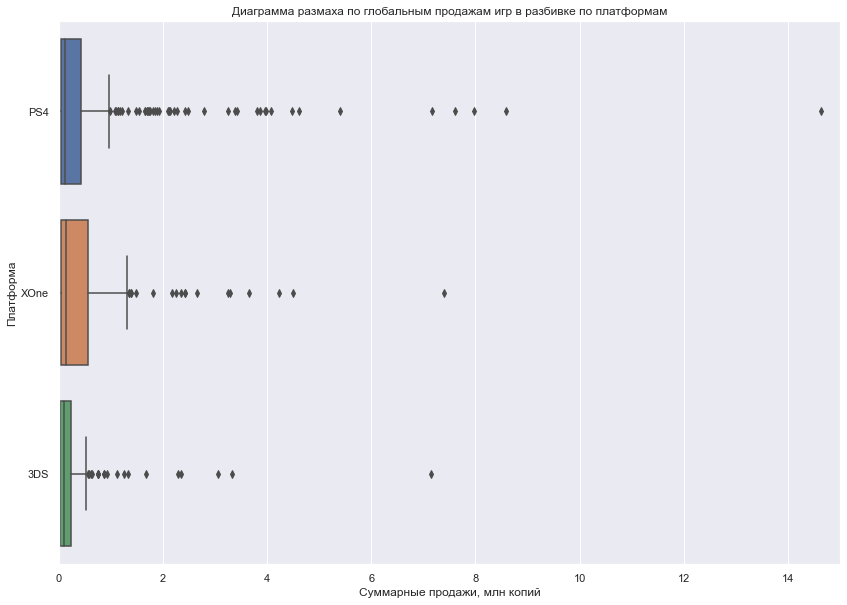

In [24]:
fig, ax = plt.subplots()
ax.set_title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')

sns.boxplot(x=tmp_df['global_sales'], y=tmp_df['platform']).set(xlim=(0, 15))
ax.set_xlabel('Суммарные продажи, млн копий')
ax.set_ylabel('Платформа')
plt.show()

**Вывод на основании диаграмм размаха:**
1. PS-4: межквартильный размах составляет 0.67 млн шт.; медиана равна 0.2 млн шт.; нормальные значения распределены в диапазоне от 0.01 до 1.74 млн шт., значения за пределами диапазона являются выбросами;
2. 3DS: межквартильный размах составляет 0.28 млн шт.; медиана равна 0.12 млн шт.; нормальные значения распределены в диапазоне от 0.01 до 0.76 млн шт., значения за пределами диапазона являются выбросами;
3. XOne: межквартильный размах составляет 0.63 млн шт.; медиана равна 0.22 млн шт.; нормальные значения распределены в диапазоне от 0.01 до 1.62 млн шт., значения за пределами диапазона являются выбросами;

4. Наибольшее количество игр-рекордсменов (наибольшее количество выбросов) встрчается на платформе PS-4.

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы 

Теперь посмотрим, как отзывы пользователей и критиков влияют на продажи внутри одной популярной платформы. Для этого построим диаграмму рассеяния для платформы PS4 и посчитаем корреляцию между отзывами и продажами:

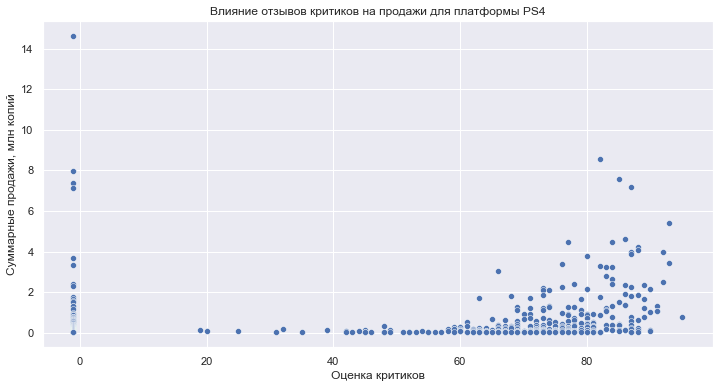

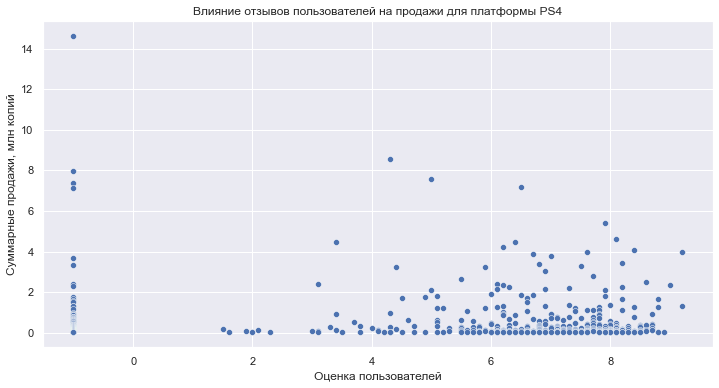

In [25]:
ps4_df = df.query('platform == "PS4" & user_score != -1')
sns.set(rc={'figure.figsize':(12,6)})

fig, ax = plt.subplots()
ax.set_title('Влияние отзывов критиков на продажи для платформы PS4')
ax.set_xlabel('Оценка критиков')
ax.set_ylabel('Суммарные продажи, млн копий')

sns.scatterplot(x='critic_score', y='global_sales', data=tmp_df);
plt.show()

fig, ax = plt.subplots()
ax.set_title('Влияние отзывов пользователей на продажи для платформы PS4')
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Суммарные продажи, млн копий')

sns.scatterplot(x='user_score', y='global_sales', data=tmp_df);
plt.show()

In [26]:
# найдем коэффициент корреляции
print("Коэффициент корреляции Пирсона:")
print(ps4_df[['critic_score', 'user_score', 'global_sales']].corr()['global_sales'])

Коэффициент корреляции Пирсона:
critic_score    0.328367
user_score     -0.059738
global_sales    1.000000
Name: global_sales, dtype: float64


**Вывод**: по графикам видим, что отзывы критиков и пользователей не оказывают влияния на продажи внутри платформы PS4.

### Выводы о продажах игр на других платформах

Соотнесем вывод с продажами игр на других платформах:

In [27]:
# найдем коэффициенты корелляции для других платформ
platforms = df['platform'].unique()

for i in platforms:
    tmp = df.query('platform == @i & user_score != -1')
    print("Коэффициент корреляции Пирсона для платформы", i)
    print(tmp[['critic_score', 'user_score', 'global_sales']].corr()['global_sales'])

Коэффициент корреляции Пирсона для платформы PS4
critic_score    0.328367
user_score     -0.059738
global_sales    1.000000
Name: global_sales, dtype: float64
Коэффициент корреляции Пирсона для платформы XOne
critic_score    0.381815
user_score     -0.041467
global_sales    1.000000
Name: global_sales, dtype: float64
Коэффициент корреляции Пирсона для платформы 3DS
critic_score    0.176479
user_score      0.198796
global_sales    1.000000
Name: global_sales, dtype: float64
Коэффициент корреляции Пирсона для платформы WiiU
critic_score    0.327128
user_score      0.363519
global_sales    1.000000
Name: global_sales, dtype: float64
Коэффициент корреляции Пирсона для платформы PS3
critic_score   -0.125176
user_score     -0.165295
global_sales    1.000000
Name: global_sales, dtype: float64
Коэффициент корреляции Пирсона для платформы X360
critic_score         NaN
user_score     -0.281308
global_sales    1.000000
Name: global_sales, dtype: float64
Коэффициент корреляции Пирсона для платформ

**Вывод:**

Для остальных платформ влияние отзывов критиков и пользователей на продажи аналогично сделанным выше выводам внутри платформы PS4: отзывы критиков и пользователей не оказывают влияния на суммарные продажи.

### Общее распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам:

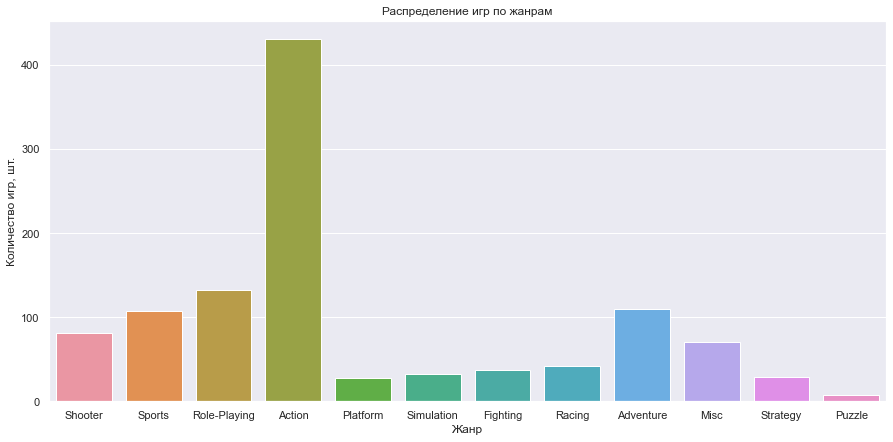

In [28]:
sns.set(rc={'figure.figsize':(15,7)})

fig, ax = plt.subplots()
ax.set_title('Распределение игр по жанрам')

ax = sns.countplot(x='genre', data=df);
ax.set_xlabel('Жанр')
ax.set_ylabel('Количество игр, шт.')
plt.show()

**Вывод:**

Лидером по количеству игр в мире является жанр Action, далее идут Role-Playing, Adventure, Sports и Shooter.

Изучим, какие жанры игр являются самыми прибыльными; для этого построим диаграммы размаха по глобальным продажам в разбивке по жанрам:

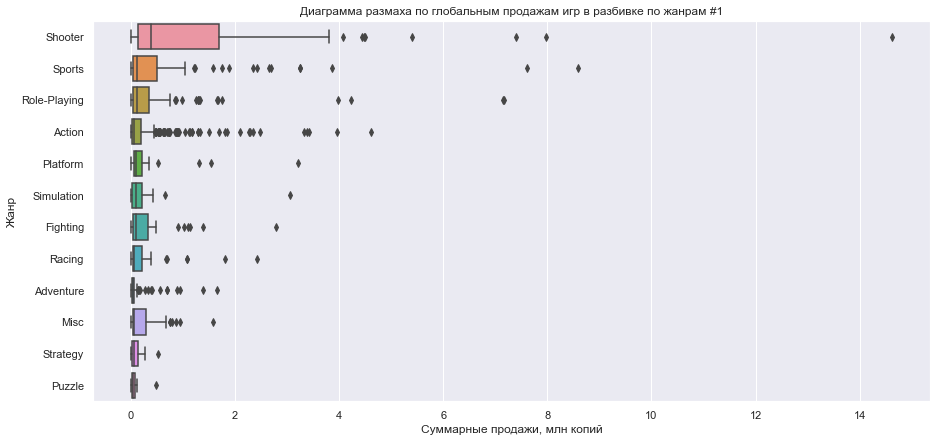

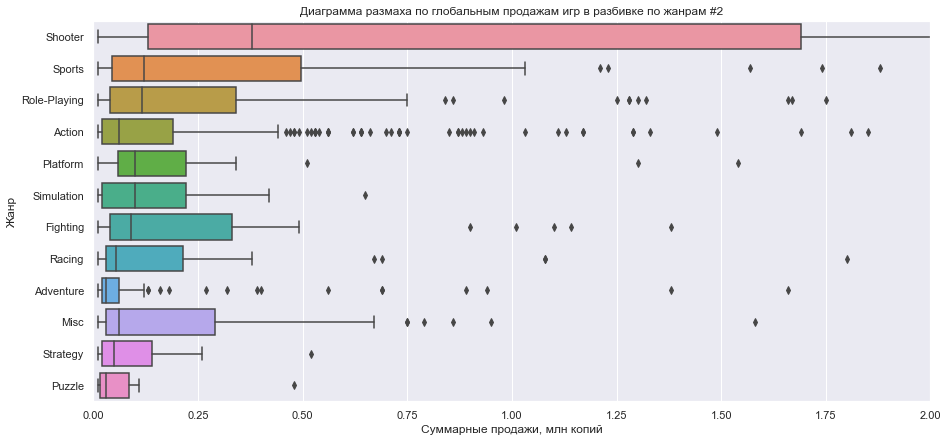

In [29]:
fig, ax = plt.subplots()
ax.set_title('Диаграмма размаха по глобальным продажам игр в разбивке по жанрам #1')
ax = sns.boxplot(x=df['global_sales'], y=df['genre']);
ax.set_xlabel('Суммарные продажи, млн копий')
ax.set_ylabel('Жанр')
plt.show()

fig, ax = plt.subplots()
ax.set_title('Диаграмма размаха по глобальным продажам игр в разбивке по жанрам #2')
sns.boxplot(x=df['global_sales'], y=df['genre']).set(xlim=(0, 2));
ax.set_xlabel('Суммарные продажи, млн копий')
ax.set_ylabel('Жанр')
plt.show()

По графикам делаем вывод, что ТОП-3 наиболее прибыльных жанров выглядит так: Shooter, Sports и Role-Playing.

У этих жанров наибольшие медианные продажи, диаграмма размаха более стабильна и имеет более длинный ряд успешно продающихся игр.

**Вывод:** 
* Наиболее прибыльные жанры: Shooter, Sports и Role-Playing.
* Наименее прибыльные жанры: Puzzle, Adventure и Strategy.

## Портрет пользователя региона

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы, самые популярные жанры и изучим влияние рейтинга ESRB на продажи:

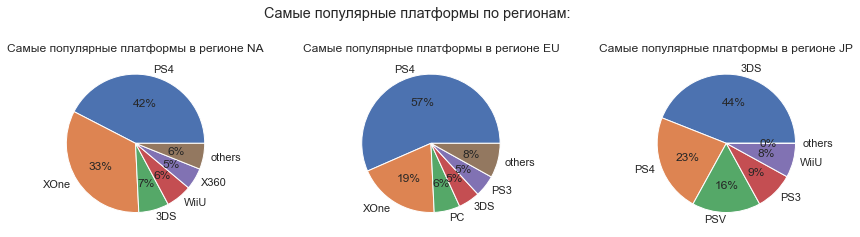

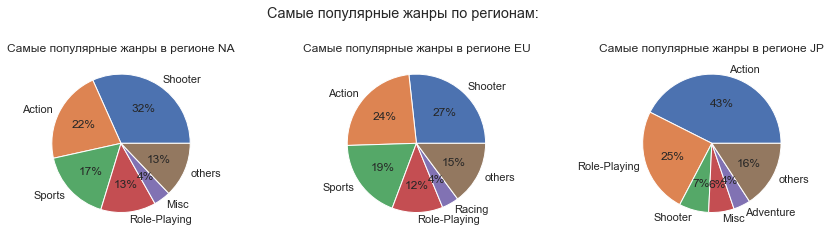

In [30]:
# словарь регионов
regional_sales = {'NA' : 'na_sales', 
                  'EU': 'eu_sales',
                  'JP' : 'jp_sales'}    

# Определим для каждого региона самые популярные платформы
fig, axes = plt.subplots(nrows = 1, ncols = 3)
fig.suptitle('Самые популярные платформы по регионам:')

i = 1
for reg in regional_sales:
    reg_df = df.pivot_table(index=['platform'], values=regional_sales[reg], aggfunc=['sum']).reset_index()
    reg_df.columns = ['platform', 'sales_volume']
    reg_df = reg_df.sort_values(by='sales_volume', ascending=False).reset_index(drop=True)
    reg_df['sales_share'] = round(reg_df['sales_volume'] / reg_df['sales_volume'].sum(), 2)
   
    reg_df.loc[5,'sales_volume'] = reg_df.query('index >= 5')['sales_volume'].sum()
    reg_df.loc[5,'sales_share'] = reg_df.query('index >= 5')['sales_share'].sum()
    reg_df.loc[5,'platform'] = 'others'
    reg_df = reg_df.query('index <= 5')
    
    ax = plt.subplot(2,3,i)
    ax.set_title("Самые популярные платформы в регионе " + reg)
    plt.pie(reg_df['sales_share'], labels = reg_df['platform'],  autopct='%.0f%%'); #colors = palette_color,
    i+=1
    
plt.show()
    
# Определим для каждого региона самые популярные жанры
fig, axes = plt.subplots(nrows = 1, ncols = 3)
fig.suptitle('Самые популярные жанры по регионам:')

i = 1
for reg in regional_sales:
    reg_df = df.pivot_table(index=['genre'], values=regional_sales[reg], aggfunc=['sum']).reset_index()
    reg_df.columns = ['genre', 'sales_volume']
    reg_df = reg_df.sort_values(by='sales_volume', ascending=False).reset_index(drop=True)
    reg_df['sales_share'] = round(reg_df['sales_volume'] / reg_df['sales_volume'].sum(), 2)
   
    reg_df.loc[5,'sales_volume'] = reg_df.query('index >= 5')['sales_volume'].sum()
    reg_df.loc[5,'sales_share'] = reg_df.query('index >= 5')['sales_share'].sum()
    reg_df.loc[5,'genre'] = 'others'
    reg_df = reg_df.query('index <= 5')
    
    ax = plt.subplot(2,3,i)
    ax.set_title("Самые популярные жанры в регионе " + reg)
    plt.pie(reg_df['sales_share'], labels = reg_df['genre'],  autopct='%.0f%%'); # colors = palette_color,
    i+=1
    
plt.show()

Теперь изучим влияние рейтинга ESRB на продажи в каждом регионе:

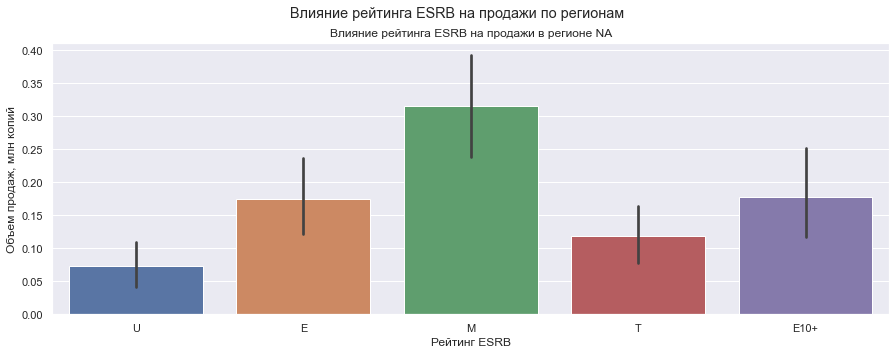

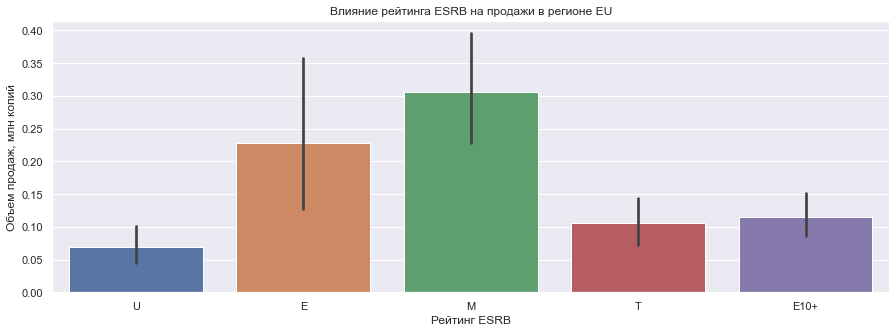

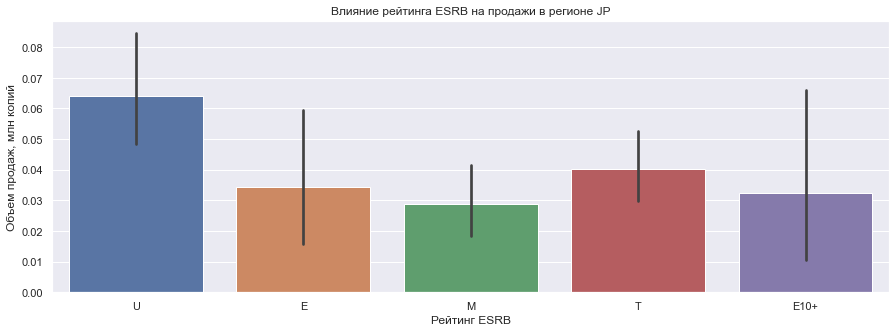

In [31]:
sns.set(rc={'figure.figsize':(15,5)})
fig, ax = plt.subplots()
fig.suptitle('Влияние рейтинга ESRB на продажи по регионам')

for reg in regional_sales:
    ax = sns.barplot(data=df, x='rating', y=regional_sales[reg])
    ax.set_title('Влияние рейтинга ESRB на продажи в регионе ' + reg)
    ax.set_xlabel('Рейтинг ESRB')
    ax.set_ylabel('Объем продаж, млн копий')
    plt.show();

**Вывод:**

**1. ТОП-5 самых популярных платформ (доля рынка):**
* Северная Америка: PS4 (42%), XOne (33%), 3DS (7%), WiiU (6%), X360 (5%), другие (6%);
* Евросоюз:         PS4 (56%), XOne (19%), PC(6%), 3DS (5%), PS3 (5%), другие (8%);
* Япония:           3DS (44%), PS4 (23%), PSV	(16%), PS3 (9%), WiiU (8%), другие (<1%);

**2. ТОП-5 самых популярных жанров:**
* Северная Америка: Shooter, Action, Sports, Role-Playing, Misc;
* Евросоюз: Shooter, Action, Sports, Role-Playing, Racing;
* Япония: Action, Role-Playing, Shooter, Misc, Adventure;

На рынке Северной Америки и Европы в ТОП-5 самых популярных входят одни и те же жанры. 
Рынок Японии самобытен, наибольшей популярностью здесь пользуются жанры, отличные от Севрной Америки и Евросоюза.

**3. ТОП-5 самых популярных рейтингов ESRB:**
* Северная Америка: М, E10+, E, T, без рейтинга;
* Евросоюз: М, E, E10+, T, без рейтинга;
* Япония: без рейтинга, T, E, E10+, M.

## Проверка гипотез

Мы хотим проверим следующие гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

### Проверка нормальности распределения средних пользовательских рейтингов платформ Xbox One и PC

Сначала проверим нормальности распределения средних пользовательских рейтингов платформ:

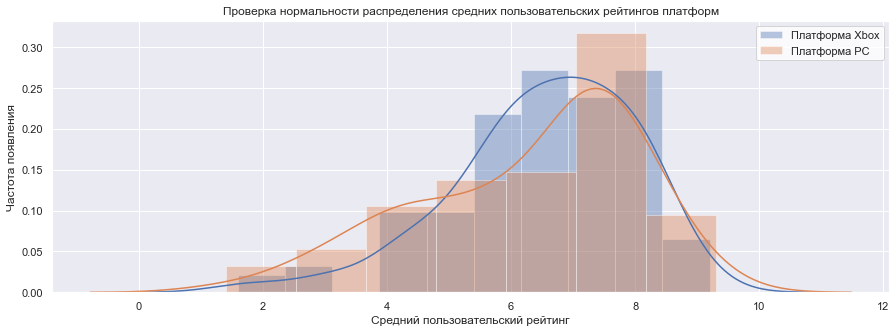

In [32]:
# сохраним нужные данные в отдельных датасетах 
xone_df = df.query('platform == "XOne" & user_score != -1')
pc_df = df.query('platform == "PC" & user_score != -1')

# избавимся от пропусков в датасетах
xone_df = xone_df.dropna().reset_index(drop=True)
pc_df = pc_df.dropna().reset_index(drop=True)

# проверим нормальности распределения средних пользовательских рейтингов
ax = sns.distplot(xone_df['user_score'], label='Платформа Xbox')
ax = sns.distplot(pc_df['user_score'], label='Платформа PC')
ax.set_title('Проверка нормальности распределения средних пользовательских рейтингов платформ')
ax.set_xlabel('Средний пользовательский рейтинг')
ax.set_ylabel('Частота появления')
ax.legend().get_frame().set_facecolor("white");
plt.show()

**Проверка распределения при помощи QQ-графиков**

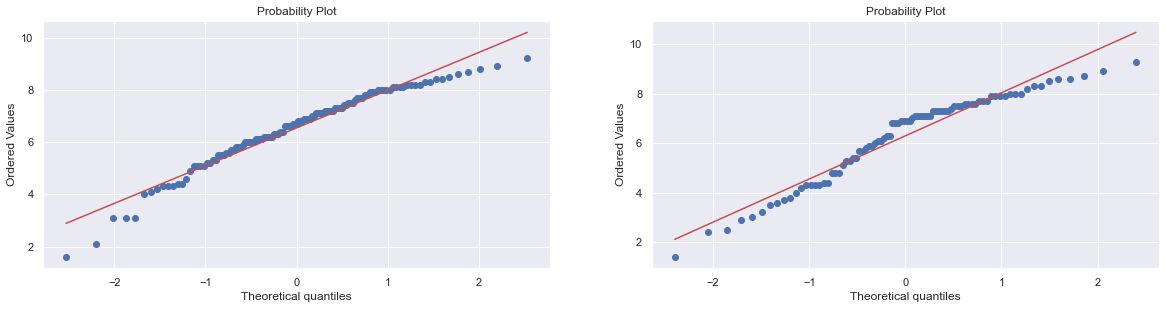

In [33]:
plt.figure(figsize =(20,10))
plt.subplot(2,2,1)
st.probplot(xone_df['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(pc_df['user_score'], dist="norm", plot=plt)
plt.show()

На основании графиков делаем вывод, что средние пользовательские рейтинги платформ Xbox One и PC распределены не нормально.

**Проверка при помощи критерия Шапиро-Уилка:**

Критерий Шапиро-Уилка:

$$
\left\{
    \begin{array}\\
        H_{0}: {Средние \ пользовательские \ рейтинги \ платформ \ Xbox \ One \ и \ PC \ распределены \ нормально.}\\
        H_{1}: {Средние \ пользовательские \ рейтинги \ платформ \ Xbox \ One \ и \ PC \ распределены \ не \ нормально.}
    \end{array}
\right.
$$

In [34]:
print("W-statistic: %f, p-value: %f" % st.shapiro(xone_df['user_score']))
print("W-statistic: %f, p-value: %f" % st.shapiro(pc_df['user_score']))

W-statistic: 0.956899, p-value: 0.000677
W-statistic: 0.940111, p-value: 0.000702


Отвергаем нулевую гипотезу: распределения не являются нормальными.

### Двухсторонняя проверка: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

Введем основную и альтернативную гипотезы:

$$
\left\{
    \begin{array}\\
        H_{0}: {Средние \ пользовательские \ рейтинги \ платформ \ Xbox \ One \ и \ PC \ одинаковые.}\\
        H_{1}: {Средние \ пользовательские \ рейтинги \ платформ \ Xbox \ One \ и \ PC \ отличаются.}
    \end{array}
\right.
$$

Уровень значимости: α = 0.05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух независимых выборок.

Если p-value будет меньше α, то нулевую гипотезу о равенстве средних пользовательских рейтингов платформ отвергаем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [35]:
alpha = 0.05

results = st.ttest_ind(xone_df['user_score'], pc_df['user_score'], equal_var=False)
print("p-значение:", results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


Также проверим гипотезу с помощью непараметрического теста Мана-Уитни::

In [36]:
alpha = 0.05

results = st.mannwhitneyu(xone_df['user_score'], pc_df['user_score'])
print("p-значение:", results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5485557456791791
Не получилось отвергнуть нулевую гипотезу


**Вывод:** p-value получилось больше выбранного уровня α = 0.05. Поэтому данные не позволили нам отвергнуть нулевую гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC отличаются, но с большой вероятностью такое различие можно получить случайно.

### Проверка нормальности распределения средних пользовательских рейтингов жанров Action и Sports

Проверим нормальности распределения средних пользовательских рейтингов жанров:

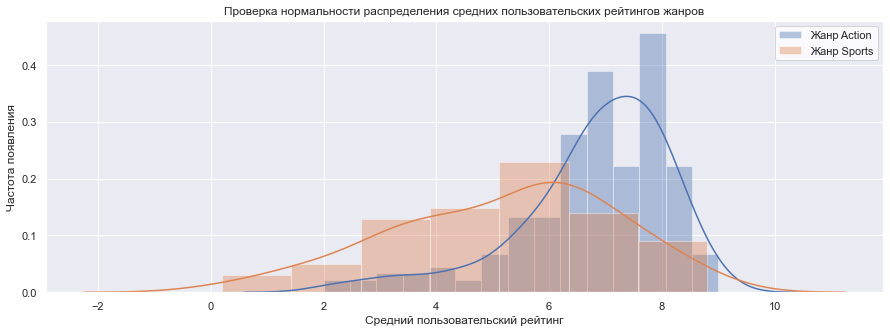

In [37]:
# для удобства сохраним нужные данные в отдельных датасетах 
action_df = df.query('genre == "Action" & user_score != -1')
sports_df = df.query('genre == "Sports" & user_score != -1')

# избавимся от пропусков в датасетах
action_df = action_df.dropna().reset_index(drop=True)
sports_df = sports_df.dropna().reset_index(drop=True)

# проверим нормальности распределения средних пользовательских рейтингов
ax = sns.distplot(action_df['user_score'], label='Жанр Action')
ax = sns.distplot(sports_df['user_score'], label='Жанр Sports')
ax.set_title('Проверка нормальности распределения средних пользовательских рейтингов жанров')
ax.set_xlabel('Средний пользовательский рейтинг')
ax.set_ylabel('Частота появления')
ax.legend().get_frame().set_facecolor("white");
plt.show()

**Проверка распределения при помощи QQ-графиков**

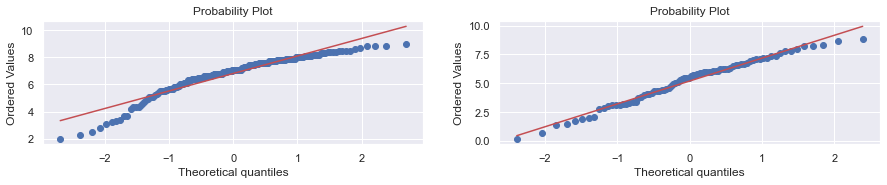

In [38]:
plt.subplot(2,2,1)
st.probplot(action_df['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(sports_df['user_score'], dist="norm", plot=plt)
plt.show()

На основании графиков делаем вывод, что средние пользовательские рейтинги жанров Action и Sports распределены не нормально.

**Проверка при помощи критерия Шапиро-Уилка:**

Критерий Шапиро-Уилка:

$$
\left\{
    \begin{array}\\
        H_{0}: {Средние \ пользовательские \ рейтинги \ жанров \ Action \ и \ Sports \ распределены \ нормально.}\\
        H_{1}: {Средние \ пользовательские \ рейтинги \ жанров \ Action \ и \ Sports \ распределены \ не \ нормально.}
    \end{array}
\right.
$$

In [39]:
print("W-statistic: %f, p-value: %f" % st.shapiro(action_df['user_score']))
print("W-statistic: %f, p-value: %f" % st.shapiro(sports_df['user_score']))

W-statistic: 0.907514, p-value: 0.000000
W-statistic: 0.976479, p-value: 0.136654


Отвергаем нулевую гипотезу: распределения не являются нормальными.

### Односторонняя проверка: cредние пользовательские рейтинги жанров Action и Sports разные.

Введем основную и альтернативную гипотезы:

$$
\left\{
    \begin{array}\\
        H_{0}: {Средние \ пользовательские \ ретинги \ жанров \ Action \ и \ Sports \ одинакове.}\\
        H_{1}: {Средние \ пользовательские \ ретинги \ жанра \ Action \ больше, \ чем \ у \ жанра \ Sports.}
    \end{array}
\right.
$$

Уровень значимости: α = 0.05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух независимых выборок.

Если p-value будет меньше α, то нулевую гипотезу о равенстве средних пользовательски ретингов жанров Action и Sports отвергаем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [40]:
alpha = 0.05

results = st.ttest_ind(action_df['user_score'], sports_df['user_score'], equal_var=False, alternative ='greater')
print("p-значение:", results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.98581774960296e-10
Отвергаем нулевую гипотезу


Также проверим гипотезу с помощью непараметрического теста Мана-Уитни:

In [41]:
alpha = 0.05

results = st.mannwhitneyu(action_df['user_score'], sports_df['user_score'])
print("p-значение:", results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.3982324399866677e-11
Отвергаем нулевую гипотезу


**Вывод:** p-value получилось меньше выбранного уровня α = 0.05. Поэтому отвергаем нулевую гипотезу: средние пользовательские ретинги жанра Action больше, чем у жанра Sports.

### Вывод:

На основании проведенного исследования мы получили следующие результаты относительно закономерностей, определяющих успешность игр:
* Характерные особенности для актуального периода: 
    - ТОП-5 платформ-лидеров по продажам в мире: PS4, XOne, 3DS, WiiU, PS3;
    - Тенденция на глобальном рынке: продажи игр падают на всех платформах;
    - Платформы с наибольшим потенциалом по прибыли в 2017 году: PS4, XOne и 3DS.
    
    
* Для всех платформ характерно то, что отзывы критиков и пользователей не оказывают влияния на суммарные продажи.
* Лидером по количеству игр в мире является жанр Action, далее идут Role-Playing и Adventure.
* Наиболее прибыльные жанры: Shooter, Sports и Role-Playing.
* Наименее прибыльные жанры: Puzzle, Adventure и Strategy.

ТОП-5 самых популярных платформ по регионам:
* Северная Америка: PS4 (42%), XOne (33%), 3DS (7%), WiiU (6%), X360 (5%), другие (6%);
* Евросоюз: PS4 (56%), XOne (19%), PC(6%), 3DS (5%), PS3 (5%), другие (8%);
* Япония: 3DS (44%), PS4 (23%), PSV (16%), PS3 (9%), WiiU (8%), другие (<1%);

ТОП-5 самых популярных жанров по регионам:
* Северная Америка: Shooter, Action, Sports, Role-Playing, Misc;
* Евросоюз: Shooter, Action, Sports, Role-Playing, Racing;
* Япония: Action, Role-Playing, Shooter, Misc, Adventure;

ТОП-5 самых популярных рейтингов ESRB:
* Северная Америка: М, E10+, E, T, без рейтинга;
* Евросоюз: М, E, E10+, T, без рейтинга;
* Япония: без рейтинга, T, E, E10+, M.

Проверка гипотез:
* На имеющихся данных, на уровне значимости 5%, есть основания не отвергать нулевую гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC отличаются, но с большой вероятностью такое различие можно получить случайно..
* На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу: средние пользовательские ретинги жанра Action больше, чем у жанра Sports.

## Общий вывод

Для определения потенциально популярных продуктов и планирования рекламных кампаний интернет-магазина в 2017 году мы использовали входные данные со статистикой продаж игр, оценками пользователей и экспертов, жанров и платформ.

Данные были проверены на наличие ошибок и оценки их влияния на исследование. Далее была выполнена предобработка данных, которая в себя включала поиск и заполнение пропущенных значений, а также поиск и обработку ошибок. 

После этого был проведен исследовательский анализ данных и проверены гипотезы: вывод с описанием полученных результатов доступен для каждого этапа исследования.

**Прогноз на 2017 год:**

По результатам исследования потенциально прибыльными продуктами, на которые в 2017 году рекомендуется сделать ставки и спланировать рекламные компании, будут игры со следующими параметрами:
* ТОП-3 платформ с наибольшим потенциалом по прибыли (глобальный рынок): PS4, XOne и 3DS;
* ТОП-3 жанров с наибольшими объемами продаж (глобальный рынок): PS4, XOne, 3DS;
* При выборе потенциально прибыльных игр следует учитывать, что оценки критиков и пользователей не оказывают влияния на суммарные продажи.

Рекомендации относительно потенциально прибыльных продуктов с точки зрения наиболее популярных платформ, жанров и рейтингов ESRB при сегментации по регионам;
1. ТОП-5 платформ:
* Северная Америка: PS4 (42%), XOne (33%), 3DS (7%), WiiU (6%), X360 (5%), другие (6%);
* Евросоюз: PS4 (56%), XOne (19%), PC(6%), 3DS (5%), PS3 (5%), другие (8%);
* Япония: 3DS (44%), PS4 (23%), PSV (16%), PS3 (9%), WiiU (8%), другие (<1%);

2. ТОП-5 жанров:
* Северная Америка: Shooter, Action, Sports, Role-Playing, Misc;
* Евросоюз: Shooter, Action, Sports, Role-Playing, Racing;
* Япония: Action, Role-Playing, Shooter, Misc, Adventure;

3. ТОП-5 рейтингов ESRB:
* Северная Америка: М, E10+, E, T, без рейтинга;
* Евросоюз: М, E, E10+, T, без рейтинга;
* Япония: без рейтинга, T, E, E10+, M.

На имеющихся данных, на уровне значимости 5%, есть основания не отвергать нулевую гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC отличаются, но с большой вероятностью такое различие можно получить случайно.


На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу: средние пользовательские рейтинги жанра Action больше, чем у жанра Sports.